In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv('sales_data.csv') 

In [5]:
print(df.head())

         Date  Product     Product2  Units Sold  Unit Price  Revenue Region
0  07-01-2024  T-Shirt     Clothing          29         361    10469  North
1  07-01-2024   Tablet  Electronics          23         196     4508   West
2  07-01-2024  T-Shirt     Clothing          45         934    42030   West
3  14-01-2024  T-Shirt     Clothing          18         754    13572   West
4  14-01-2024  T-Shirt     Clothing          23         525    12075   East


In [6]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        195 non-null    object
 1   Product     195 non-null    object
 2   Product2    195 non-null    object
 3   Units Sold  195 non-null    int64 
 4   Unit Price  195 non-null    int64 
 5   Revenue     195 non-null    int64 
 6   Region      195 non-null    object
dtypes: int64(3), object(4)
memory usage: 10.8+ KB
None


In [7]:
df['Date']=pd.to_datetime(df['Date'], dayfirst=True)

In [8]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [10]:
total_revenue = df['Revenue'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 2918321


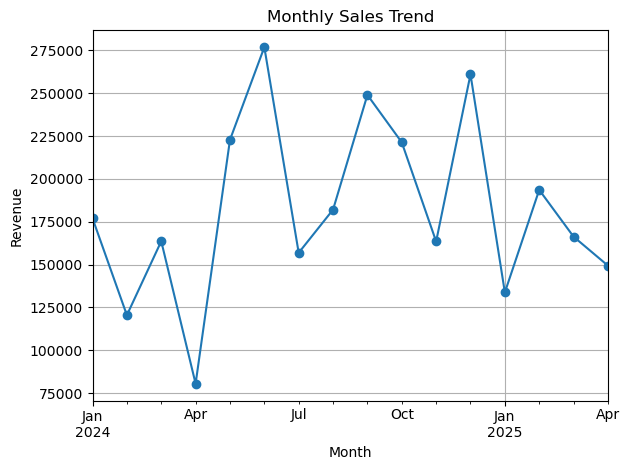

In [11]:
monthly_sales = df.groupby(df['Date'].dt.to_period('M')).sum(numeric_only=True)['Revenue']
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

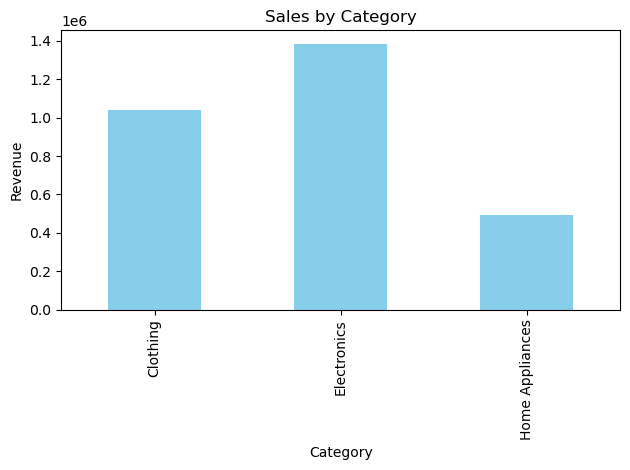

In [13]:
category_sales = df.groupby('Product2').sum(numeric_only=True)['Revenue']
category_sales.plot(kind='bar', title='Sales by Category', color='skyblue')
plt.ylabel('Revenue')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

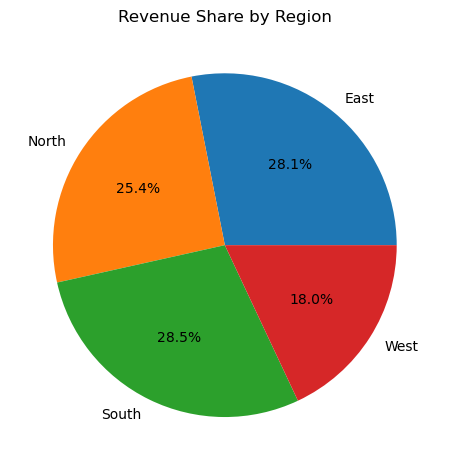

In [14]:
region_sales = df.groupby('Region').sum(numeric_only=True)['Revenue']
region_sales.plot(kind='pie', autopct='%1.1f%%', title='Revenue Share by Region')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [15]:
print(df.shape)

(195, 9)


In [16]:
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%B')
df['Quarter'] = df['Date'].dt.quarter


In [17]:
monthly_sales = df.groupby('Month_Name')['Revenue'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])


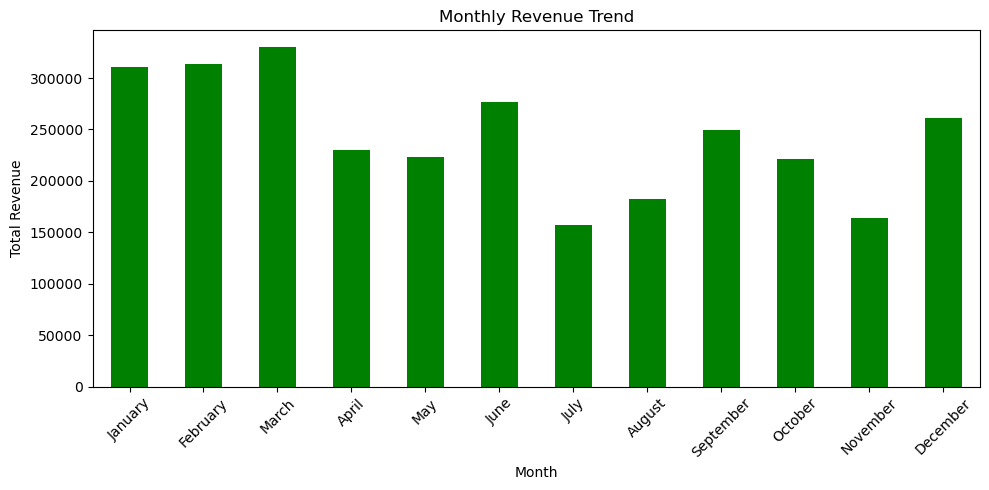

In [18]:
monthly_sales.plot(kind='bar', figsize=(10, 5), color='Green')
plt.title('Monthly Revenue Trend')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
category_sales = df.groupby('Product2')['Units Sold'].sum().reset_index()
category_sales = category_sales.sort_values(by='Units Sold', ascending=False)
print(category_sales)


          Product2  Units Sold
1      Electronics        2649
0         Clothing        1864
2  Home Appliances         880


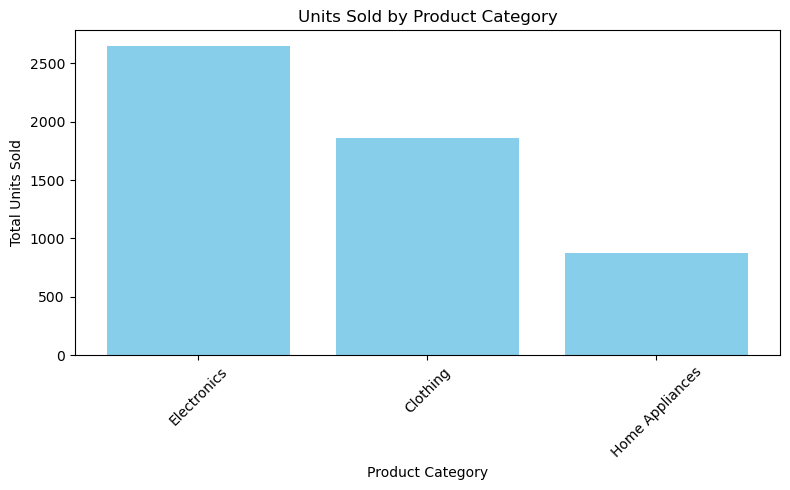

In [20]:
plt.figure(figsize=(8, 5))
plt.bar(category_sales['Product2'], category_sales['Units Sold'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Total Units Sold')
plt.title('Units Sold by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Conclusion :
#1. This Table contain 195 rows and 11 columns 
#2. The Total Revenue From 2024 to 2025 April is 2918321
#3. The Highest Perfornamce Category is Electronics and whereas Lowest is Home Appliance (In terms of revenue)
#4. The Highest Revenue Generation Region Was South and Lowest was West 
#5. From Janurary to March it was most consistence High performance revenue generation month saw in Year 2024 and from July to November it was most consistence Low performance revenue generation month saw in Year 2024
#6. By Cell number 21 and 54 we can say that there was a proper stock managment done by the product manager Because we saw that the most sold item was Electronics items and there count of unit was also enough 
#7. Home Appliances are not gaining that much attentions by customer so a market campaining need to be done and proper ads need to be run and its should reach to proper targeted customer 


In [22]:
df.to_csv('updated_sales_data.csv', index=False)
